# Read data from CCSM4 simulation

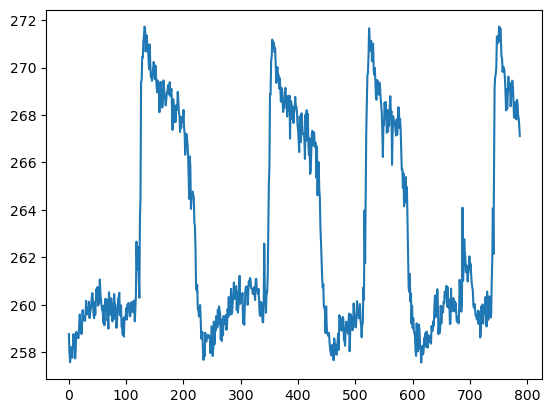

In [1]:
import numpy as np
import matplotlib.pyplot as plt

TEMP = np.load('D:/VScode/Paleoclimate_causality/data/CCSM4/TEMP/210.npy')
# plot TEMP using plt.plot
plt.plot(TEMP)


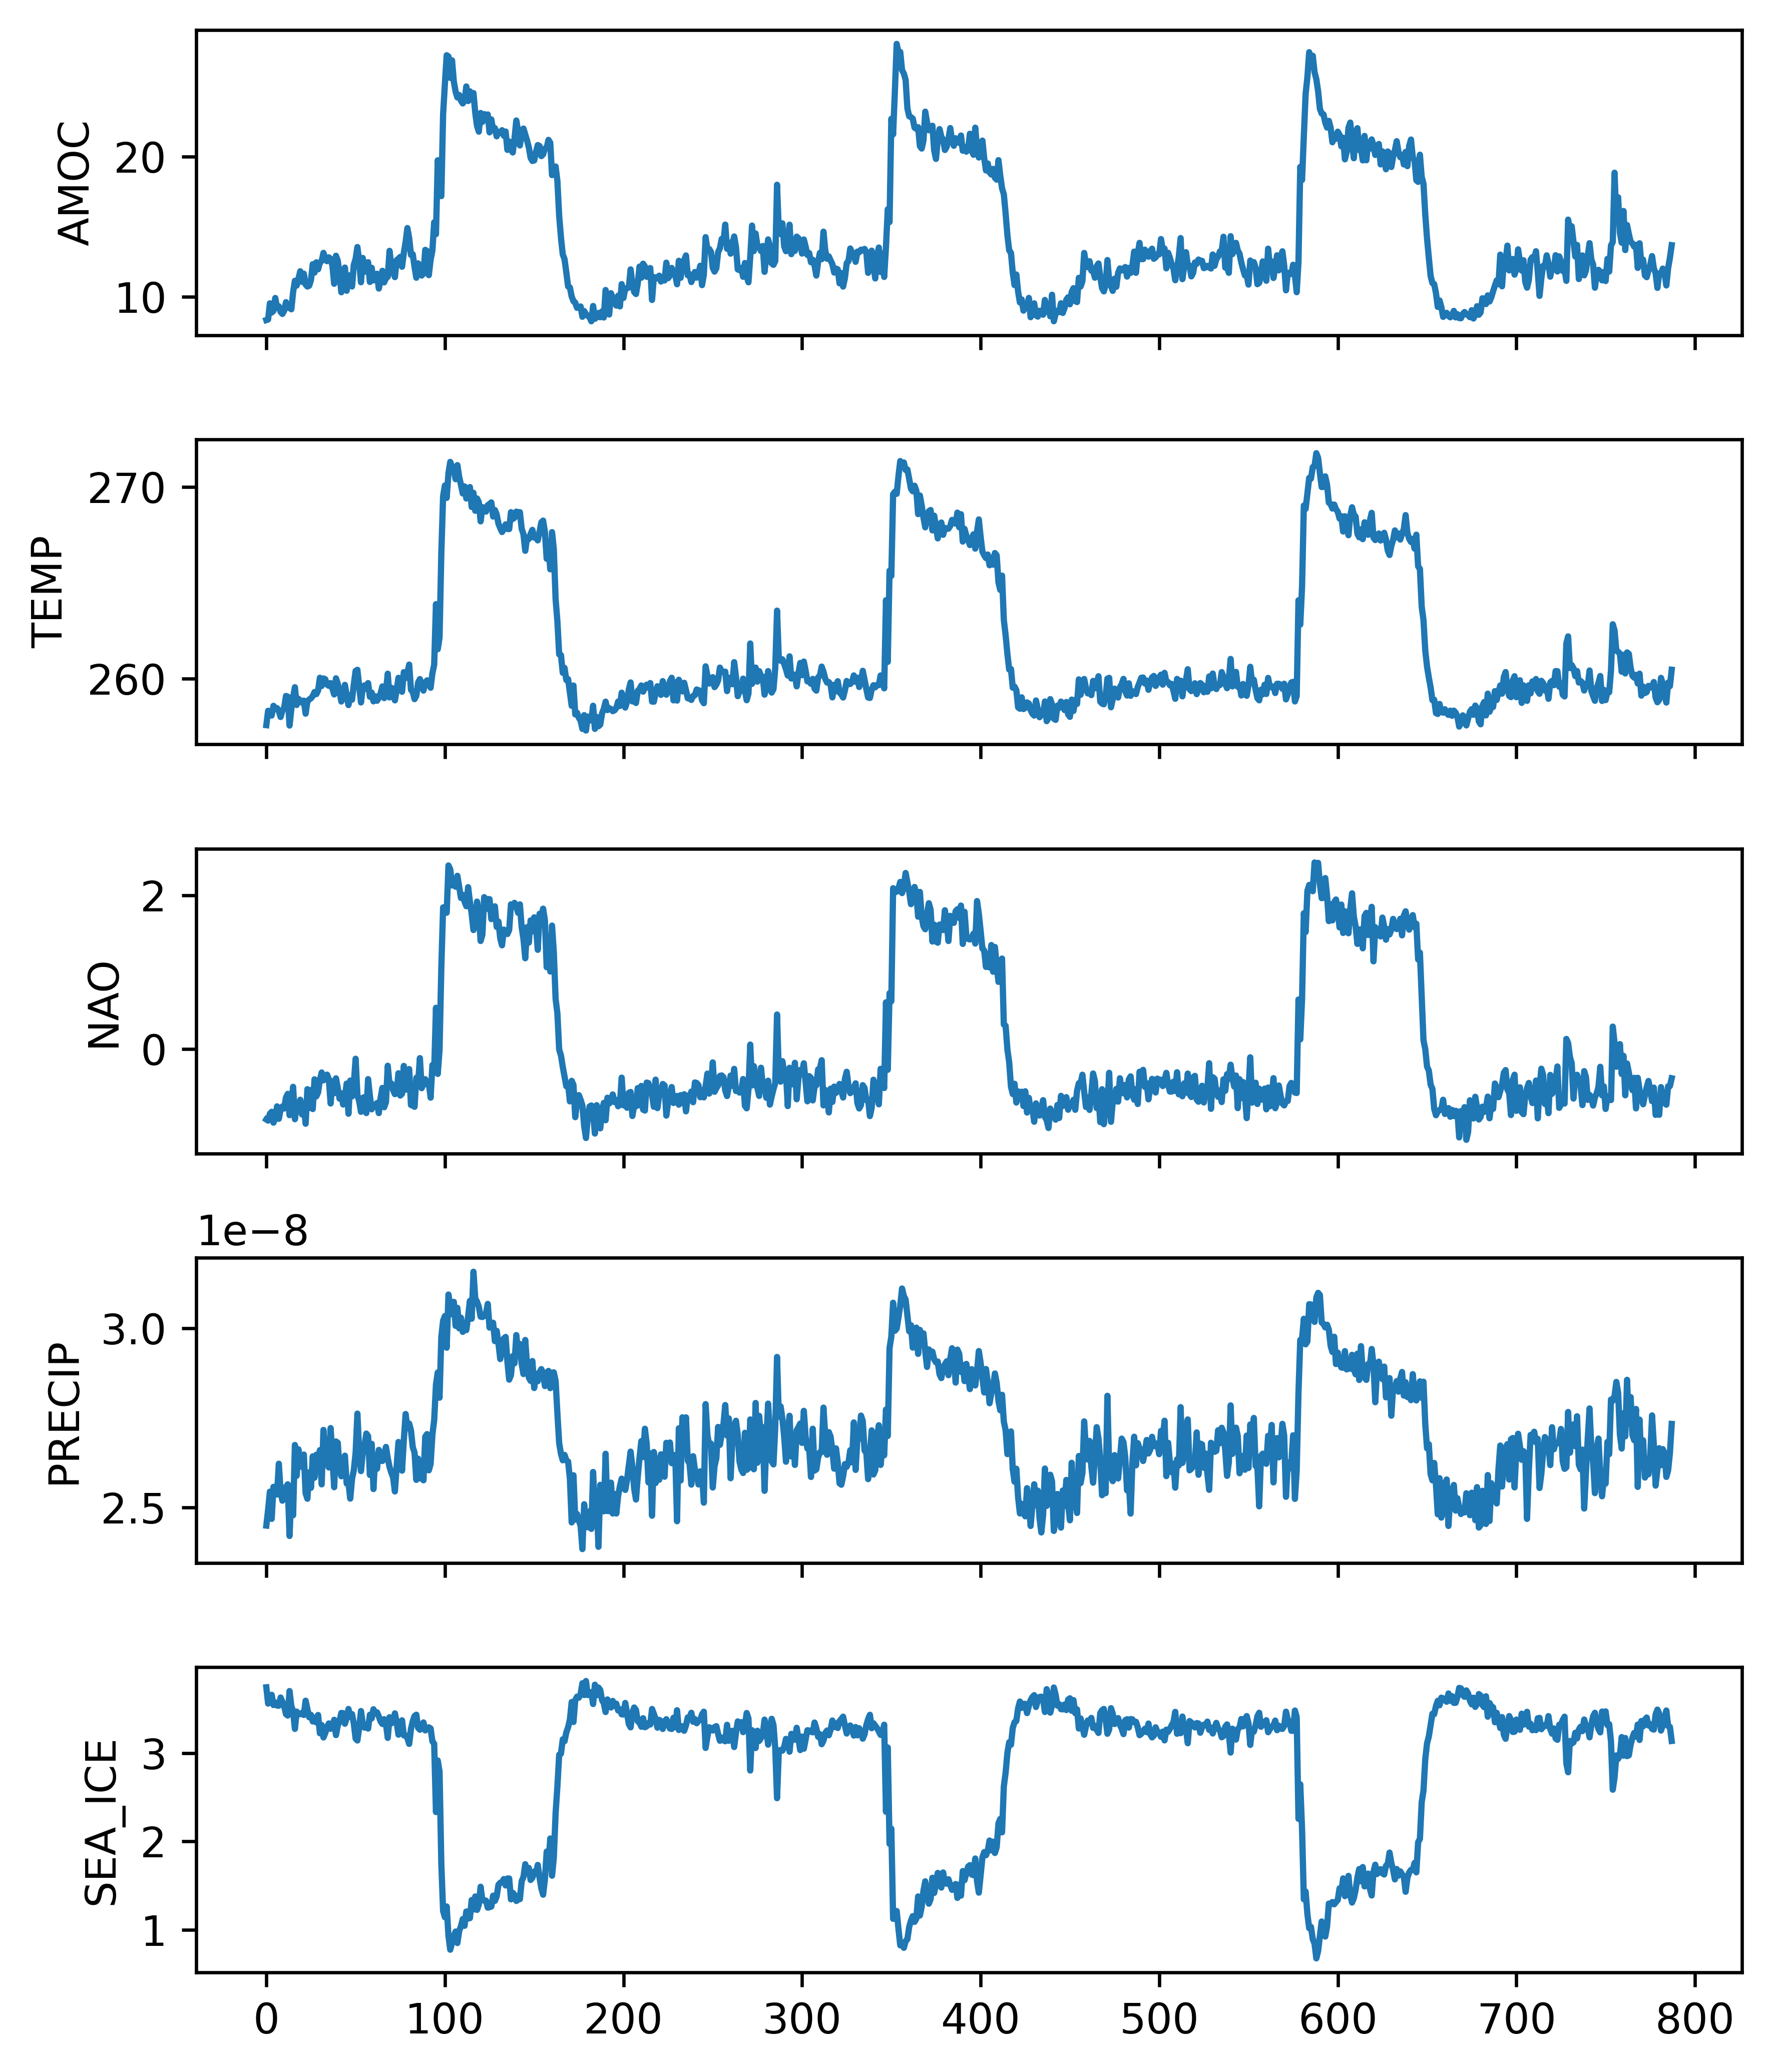

In [2]:

import numpy as np
# read the AMOC data (called '200.npy') from the /data/CCSM4/AMOC/ directory
AMOC = np.load('D:/VScode/Paleoclimate_causality/data/CCSM4/AMOC/200.npy')
TEMP = np.load('D:/VScode/Paleoclimate_causality/data/CCSM4/TEMP/200.npy')
NAO = np.load('D:/VScode/Paleoclimate_causality/data/CCSM4/NAO/200.npy')
PRECIP = np.load('D:/VScode/Paleoclimate_causality/data/CCSM4/PRECIP/200.npy')
SEA_ICE = np.load('D:/VScode/Paleoclimate_causality/data/CCSM4/SEA_ICE/200.npy')

# plot the data in 5 subplots

import matplotlib.pyplot as plt
fig, ax = plt.subplots(5, 1, figsize=(6, 7), sharex=True, dpi=600)
ax[0].plot(AMOC)
ax[0].set_ylabel('AMOC')
ax[1].plot(TEMP)
ax[1].set_ylabel('TEMP')
ax[2].plot(NAO)
ax[2].set_ylabel('NAO')
ax[3].plot(PRECIP)
ax[3].set_ylabel('PRECIP')
ax[4].plot(SEA_ICE)
ax[4].set_ylabel('SEA_ICE')
plt.tight_layout()

plt.show()


# Put all data together in a dataframe

In [3]:
import pandas as pd
df_all_vars= pd.DataFrame({'AMOC': AMOC, 'TEMP': TEMP, 'NAO': NAO, 'PRECIP': PRECIP, 'SEA_ICE': SEA_ICE})
df_all_vars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 788 entries, 0 to 787
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   AMOC     788 non-null    float32
 1   TEMP     788 non-null    float64
 2   NAO      788 non-null    float32
 3   PRECIP   788 non-null    float64
 4   SEA_ICE  788 non-null    float32
dtypes: float32(3), float64(2)
memory usage: 21.7 KB


# Crop the data for the first 150 values

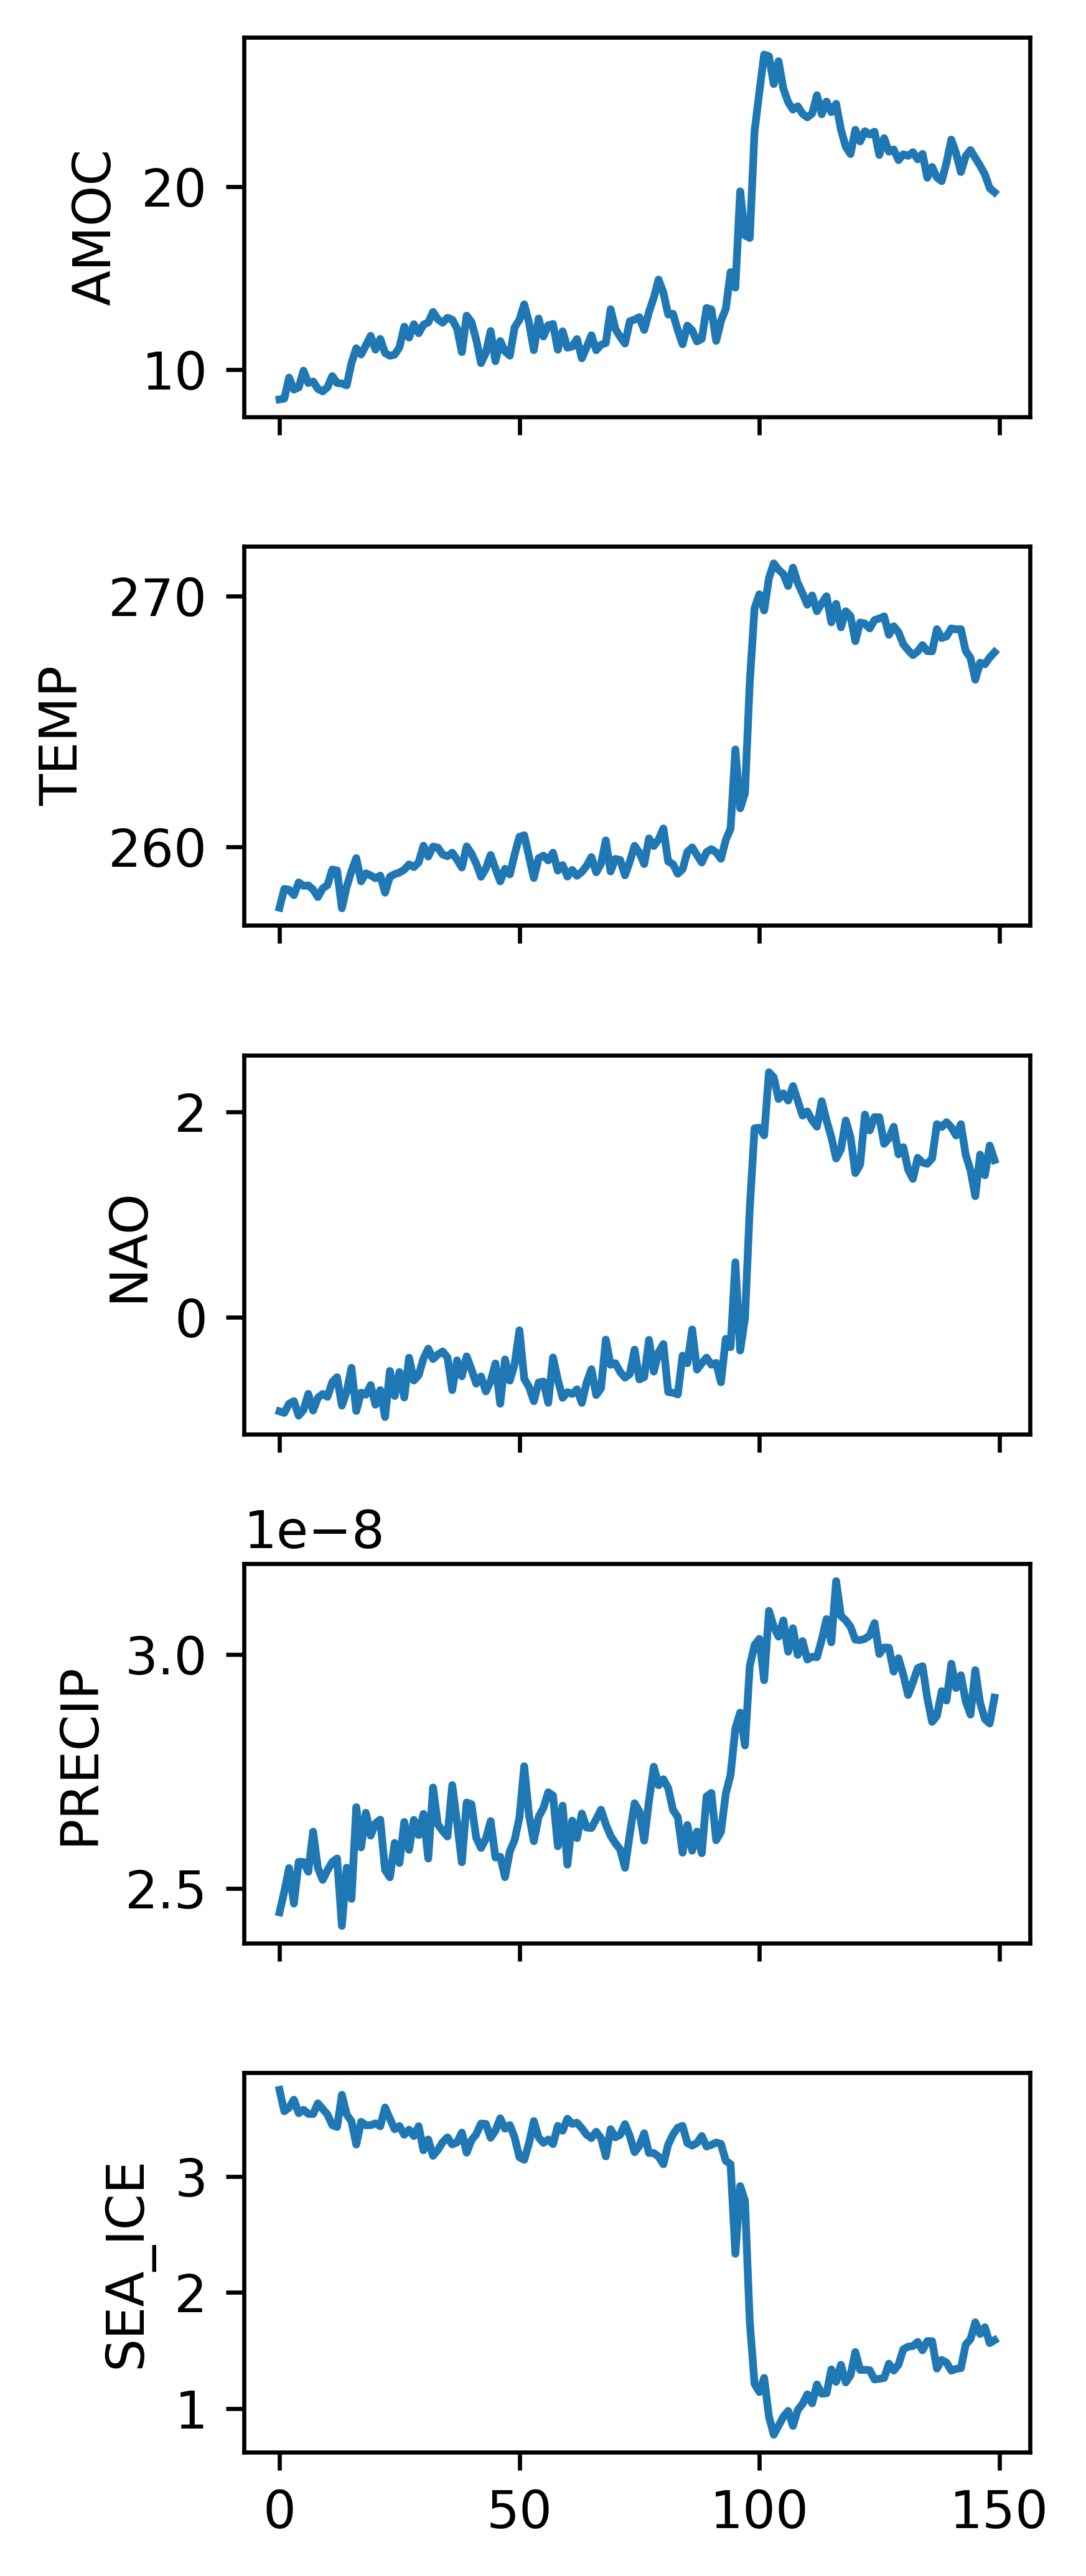

In [4]:
# crop the data for the first 150 values
df_all_vars = df_all_vars[:150]
# plot the data in 5 subplots
fig, ax = plt.subplots(5, 1, figsize=(3, 7), sharex=True, dpi=600)
ax[0].plot(df_all_vars['AMOC'])
ax[0].set_ylabel('AMOC')
ax[1].plot(df_all_vars['TEMP'])
ax[1].set_ylabel('TEMP')
ax[2].plot(df_all_vars['NAO'])
ax[2].set_ylabel('NAO')
ax[3].plot(df_all_vars['PRECIP'])
ax[3].set_ylabel('PRECIP')
ax[4].plot(df_all_vars['SEA_ICE'])
ax[4].set_ylabel('SEA_ICE')
plt.tight_layout()
plt.show()

In [25]:
df_all_vars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   AMOC     150 non-null    float32
 1   TEMP     150 non-null    float64
 2   NAO      150 non-null    float32
 3   PRECIP   150 non-null    float64
 4   SEA_ICE  150 non-null    float32
dtypes: float32(3), float64(2)
memory usage: 4.2 KB


In [32]:
import numpy as np
import matplotlib.pyplot as plt
import tigramite
from tigramite import data_processing as pp
from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.independence_tests import parcorr, gpdc, cmiknn


# Convert your dataframe to a numpy array
data = df_all_vars.values
var_names=['AMOC', 'TEMP', 'NAO', 'PRECIP', 'SEA_ICE']
# Create a Tigramite DataFrame object
dataframe = pp.DataFrame(data,
                         datatime=np.arange(len(data)),
                         var_names=var_names)


In [30]:
dataframe

(<Figure size 640x480 with 5 Axes>,
 array([<Axes: ylabel='AMOC'>, <Axes: ylabel='TEMP'>, <Axes: ylabel='NAO'>,
        <Axes: ylabel='PRECIP'>, <Axes: ylabel='SEA_ICE'>], dtype=object))

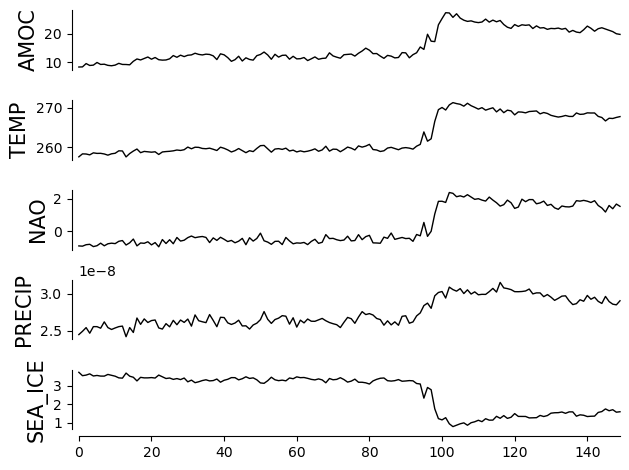

In [36]:
tp.plot_timeseries(dataframe,label_fontsize=15,tick_label_size=10)


##
## Step 1: PC1 algorithm for selecting lagged conditions
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 2
pc_alpha = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
max_conds_dim = None
max_combinations = 1



## Resulting lagged parent (super)sets:

    Variable AMOC has 3 link(s):
    [pc_alpha = 0.4]
        (AMOC -1): max_pval = 0.00000, |min_val| =  0.504
        (SEA_ICE -1): max_pval = 0.22160, |min_val| =  0.102
        (TEMP -2): max_pval = 0.35513, |min_val| =  0.078

    Variable TEMP has 2 link(s):
    [pc_alpha = 0.1]
        (AMOC -1): max_pval = 0.02387, |min_val| =  0.188
        (TEMP -1): max_pval = 0.05879, |min_val| =  0.157

    Variable NAO has 2 link(s):
    [pc_alpha = 0.2]
        (AMOC -1): max_pval = 0.05134, |min_val| =  0.163
        (SEA_ICE -1): max_pval = 0.11780, |min_val| =  0.130

    Variable PRECIP has 5 link(s):
    [pc_alpha = 0.3]
        (PRECIP -1): max_pval = 0.00528, |min_val| =  0.233
        (AMOC -1): max_pval = 0.01450, |min_val| 

(<Figure size 640x480 with 1 Axes>, <Axes: >)

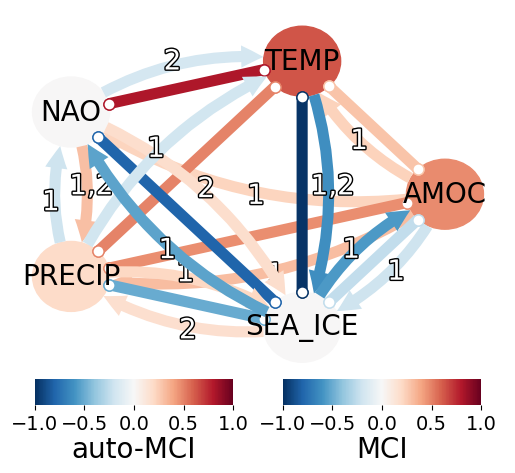

In [33]:
ParCorr = parcorr.ParCorr(significance='analytic')
pcmci = PCMCI(
    dataframe=dataframe,
    cond_ind_test=ParCorr,
    verbosity=1)

pcmci.verbosity = 1
tau_max=2
results = pcmci.run_pcmci(tau_max=tau_max, pc_alpha=None)
q_matrix = pcmci.get_corrected_pvalues(p_matrix=results['p_matrix'], tau_max=tau_max, fdr_method='fdr_bh')

tp.plot_graph(graph = results['graph'],
    val_matrix=results['val_matrix'],
    var_names=var_names,
    link_colorbar_label='MCI',
    node_colorbar_label='auto-MCI',
    link_label_fontsize=20,
    label_fontsize=20,
    tick_label_size=14,
    node_label_size=20,
    edge_ticks=0.5,
    node_ticks=0.5,
    node_size=0.5
    )

(<Figure size 400x400 with 1 Axes>, <Axes: >)

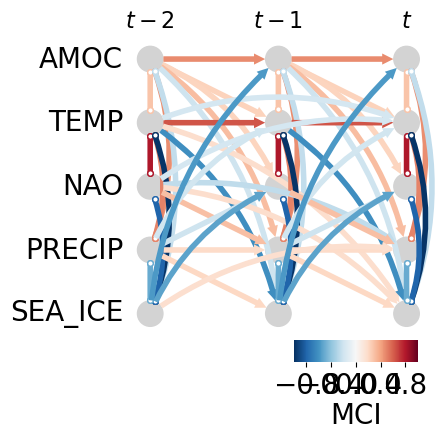

In [37]:
tp.plot_time_series_graph(
    figsize=(4, 4),
    val_matrix=results['val_matrix'],
    graph = results['graph'],
    var_names=var_names,
    link_colorbar_label='MCI',
    label_fontsize=20,
    tick_label_size=20
)

# An online example

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import tigramite
from tigramite import data_processing as pp
from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.independence_tests import parcorr, gpdc, cmiknn

def dyn(x1,x2,x3,x4):
    x1 = -0.287*x2 + np.random.normal()
    x2 = 0.4*x2 + 0.287*x1+ np.random.normal()
    x3 = 0.9*x3 + np.random.normal()
    x4 = 0.9 * x2 + np.random.normal()
    return x1,x2,x3,x4


x1_ini,x2_ini,x3_ini,x4_ini = np.random.rand(4,1) #initial state
timestep = 200
data = np.expand_dims(np.concatenate((x1_ini,x2_ini,x3_ini,x4_ini ), axis=0),axis=0) #shape = [1,4]
for step in range(timestep): # run dynamics
    x1_ini,x2_ini,x3_ini,x4_ini = dyn(x1_ini,x2_ini,x3_ini,x4_ini)
    temp = np.expand_dims(np.concatenate((x1_ini,x2_ini,x3_ini,x4_ini), axis=0),axis=0)
    data = np.concatenate((data, temp), axis=0) 
print(data.shape) #shape = [timestep+1,4]
var_names = ['x1', 'x2', 'x3', 'x4']
dataframe = pp.DataFrame(data,
                         datatime=np.arange(len(data)),
                         var_names=var_names)

(201, 4)


In [24]:
data

array([[ 4.02645927e-01,  1.29377590e-01,  9.11066700e-02,
         3.64534332e-01],
       [-7.31009771e-01, -1.14230833e+00,  1.39580697e+00,
         1.84611546e-01],
       [ 9.60740823e-01,  3.17648885e-01,  3.19615262e-01,
         2.17798430e+00],
       [-5.57406435e-01, -7.96527708e-01, -2.43829044e-01,
        -1.92797369e-01],
       [ 1.48845617e+00, -2.04503986e-02, -9.77794110e-03,
         1.04500064e+00],
       [-1.05443276e+00, -4.83417371e-01,  5.60610030e-01,
         1.83020057e+00],
       [ 7.69267871e-01,  3.27456696e-01,  1.88901122e+00,
        -8.20106772e-02],
       [-2.45838332e-01,  2.49832422e+00,  2.10433118e-01,
         3.24449117e+00],
       [-2.39669880e+00,  4.92092849e-01, -4.37532111e-01,
         9.55476975e-01],
       [ 1.34121825e+00,  1.42792287e+00,  4.59733665e-01,
         1.72238917e+00],
       [-1.86435641e+00, -6.13871047e-01,  1.07392581e+00,
        -9.58927891e-01],
       [-9.10812065e-01, -2.34224788e-01, -4.03822700e-02,
      

(<Figure size 640x480 with 4 Axes>,
 array([<Axes: ylabel='x1'>, <Axes: ylabel='x2'>, <Axes: ylabel='x3'>,
        <Axes: ylabel='x4'>], dtype=object))

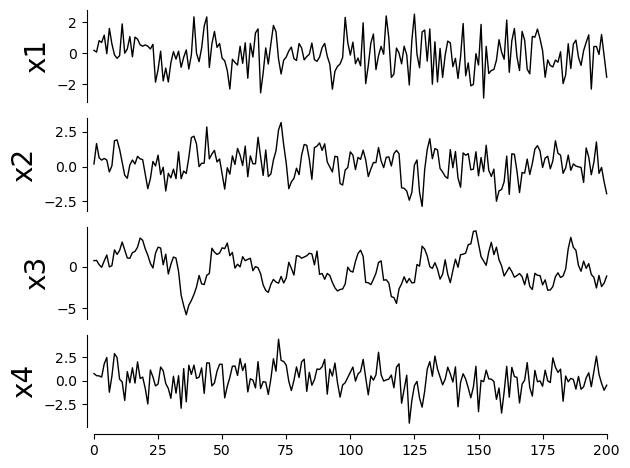

In [12]:
tp.plot_timeseries(dataframe,label_fontsize=20,tick_label_size=10)


##
## Step 1: PC1 algorithm for selecting lagged conditions
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 2
pc_alpha = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
max_conds_dim = None
max_combinations = 1



## Resulting lagged parent (super)sets:

    Variable x1 has 1 link(s):
    [pc_alpha = 0.05]
        (x2 -1): max_pval = 0.04782, |min_val| =  0.142

    Variable x2 has 1 link(s):
    [pc_alpha = 0.05]
        (x2 -1): max_pval = 0.00596, |min_val| =  0.196

    Variable x3 has 2 link(s):
    [pc_alpha = 0.3]
        (x3 -1): max_pval = 0.00000, |min_val| =  0.647
        (x1 -1): max_pval = 0.27959, |min_val| =  0.077

    Variable x4 has 1 link(s):
    [pc_alpha = 0.1]
        (x2 -1): max_pval = 0.05176, |min_val| =  0.139

##
## Step 2: MCI algorithm
##

Parameters:

independence test = par_corr
tau_min = 0
tau_max = 2
max_conds_py = None
max_conds_px = None

## Significant links at alpha = 0.05:

    Variable x1 has 3 link(s):
        (x2  0): pval = 0.00728 | val 

(<Figure size 640x480 with 1 Axes>, <Axes: >)

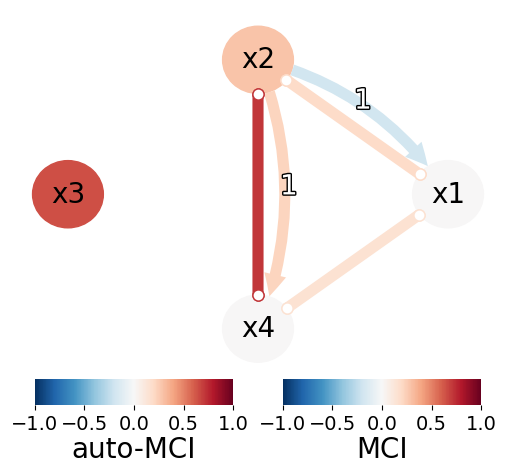

In [17]:
ParCorr = parcorr.ParCorr(significance='analytic')
pcmci = PCMCI(
    dataframe=dataframe,
    cond_ind_test=ParCorr,
    verbosity=1)

pcmci.verbosity = 1
tau_max=2
results = pcmci.run_pcmci(tau_max=tau_max, pc_alpha=None)
q_matrix = pcmci.get_corrected_pvalues(p_matrix=results['p_matrix'], tau_max=tau_max, fdr_method='fdr_bh')

tp.plot_graph(graph = results['graph'],
    val_matrix=results['val_matrix'],
    var_names=var_names,
    link_colorbar_label='MCI',
    node_colorbar_label='auto-MCI',
    link_label_fontsize=20,
    label_fontsize=20,
    tick_label_size=14,
    node_label_size=20,
    edge_ticks=0.5,
    node_ticks=0.5,
    node_size=0.5
    )

(<Figure size 400x400 with 1 Axes>, <Axes: >)

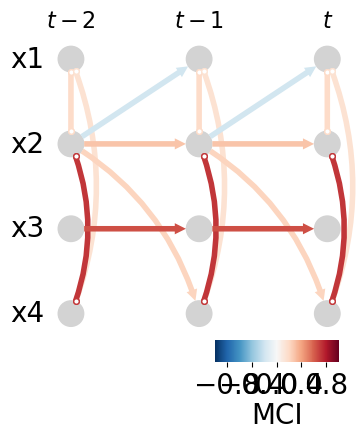

In [18]:
tp.plot_time_series_graph(
    figsize=(4, 4),
    val_matrix=results['val_matrix'],
    graph = results['graph'],
    var_names=var_names,
    link_colorbar_label='MCI',
    label_fontsize=20,
    tick_label_size=20
)

In [10]:
!pip install dcor

   ---------------------------------------- 0.0/55.5 kB ? eta -:--:--
   ---------------------------------------- 55.5/55.5 kB 1.4 MB/s eta 0:00:00


In [7]:
import pandas as pd
import numpy as np
from tigramite import data_processing as pp
from tigramite.pcmci import PCMCI
from tigramite.independence_tests import ParCorr

# Assuming 'df_all_vars' is your DataFrame
data = df_all_vars.values

# Instantiate a DataFrame object for Tigramite
dataframe = pp.DataFrame(data, 
                         datatypes=["float32", "float64", "float32", "float64", "float32"])

# Initialize PCMCI with partial correlation test
pcmci = PCMCI(
    dataframe=dataframe, 
    cond_ind_test=ParCorr()
)

# Set the maximum lag to be considered in the time series dependencies
maxlags = 5  # or adjust based on domain knowledge

# Running PCMCI
results = pcmci.run_pcmci(tau_max=maxlags, pc_alpha=None)

# Output results
link_matrix = results['p_matrix']
print("P-values from PCMCI:")
print(link_matrix)


ImportError: cannot import name 'ParCorr' from 'tigramite.independence_tests' (d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\tigramite\independence_tests\__init__.py)

In [12]:
!pip uninstall numba
!pip install numba==0.56.4


In [1]:
# uninstall numpy and reinstall numpy==1.22.0
!pip uninstall numpy
!pip install numpy==1.22.0


In [2]:
# uninstall numpy and reinstall numpy==1.19.5
!pip uninstall numpy
!pip install numpy==1.19.5

Found existing installation: numpy 1.24.4


ERROR: Cannot uninstall numpy 1.24.4, RECORD file not found. You might be able to recover from this via: 'pip install --force-reinstall --no-deps numpy==1.24.4'.


   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.1/13.3 MB 3.0 MB/s eta 0:00:05
   - -------------------------------------- 0.6/13.3 MB 6.4 MB/s eta 0:00:02
   -- ------------------------------------- 1.0/13.3 MB 7.0 MB/s eta 0:00:02
   --- ------------------------------------ 1.3/13.3 MB 7.6 MB/s eta 0:00:02
   ----- ---------------------------------- 1.8/13.3 MB 7.6 MB/s eta 0:00:02
   ------ --------------------------------- 2.1/13.3 MB 7.5 MB/s eta 0:00:02
   ------- -------------------------------- 2.5/13.3 MB 7.7 MB/s eta 0:00:02
   -------- ------------------------------- 2.9/13.3 MB 7.6 MB/s eta 0:00:02
   --------- ------------------------------ 3.2/13.3 MB 7.9 MB/s eta 0:00:02
   ---------- ----------------------------- 3.6/13.3 MB 7.9 MB/s eta 0:00:02
   ----------- ---------------------------- 3.9/13.3 MB 7.8 MB/s eta 0:00:02
   ------------- -------------------------- 4.3/13.3 MB 7.7 MB/s eta 0:00:02
   ---

ERROR: Cannot uninstall numpy 1.24.4, RECORD file not found. You might be able to recover from this via: 'pip install --force-reinstall --no-deps numpy==1.24.4'.


In [3]:
!pip list

Package                   Version
------------------------- --------------
annotated-types           0.6.0
appdirs                   1.4.4
arrow                     1.3.0
astor                     0.8.1
asttokens                 2.4.1
attrs                     23.2.0
backcall                  0.2.0
backoff                   2.2.1
basemap                   1.3.7
basemap-data              1.3.2
beautifulsoup4            4.12.3
bokeh                     3.1.1
Brotli                    1.1.0
bs4                       0.0.1
cachetools                5.3.3
Cartopy                   0.21.1
certifi                   2024.2.2
cffi                      1.16.0
cftime                    1.6.3
charset-normalizer        3.3.2
click                     8.1.7
colorama                  0.4.6
comm                      0.2.1
contourpy                 1.1.1
cryptography              42.0.5
cycler                    0.12.1
dateutils                 0.6.12
debugpy                   1.8.1
decorator          

In [10]:
!pip install --upgrade pip
!pip install --upgrade numpy scipy numba


   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   -- ------------------------------------- 0.1/2.1 MB 2.8 MB/s eta 0:00:01
   ------- -------------------------------- 0.4/2.1 MB 5.3 MB/s eta 0:00:01
   ------------- -------------------------- 0.7/2.1 MB 5.5 MB/s eta 0:00:01
   ------------------- -------------------- 1.0/2.1 MB 6.0 MB/s eta 0:00:01
   -------------------------- ------------- 1.4/2.1 MB 5.8 MB/s eta 0:00:01
   -------------------------------- ------- 1.7/2.1 MB 6.5 MB/s eta 0:00:01
   ---------------------------------------- 2.1/2.1 MB 6.4 MB/s eta 0:00:00


ERROR: To modify pip, please run the following command:
D:\Users\User\anaconda3\envs\pz_venv_causal\python.exe -m pip install --upgrade pip
ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'd:\\users\\user\\anaconda3\\envs\\pz_venv_causal\\lib\\site-packages\\numpy\\.libs\\libopenblas.fb5ae2tyxyh2ijrdkgdgq3xbklktf43h.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.



  Using cached numpy-1.24.4-cp38-cp38-win_amd64.whl.metadata (5.6 kB)
Using cached numpy-1.24.4-cp38-cp38-win_amd64.whl (14.9 MB)
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   - -------------------------------------- 0.1/2.6 MB 3.5 MB/s eta 0:00:01
   ------ --------------------------------- 0.4/2.6 MB 5.4 MB/s eta 0:00:01
   ------------- -------------------------- 0.9/2.6 MB 7.0 MB/s eta 0:00:01
   ------------- -------------------------- 0.9/2.6 MB 5.2 MB/s eta 0:00:01
   ---------------------- ----------------- 1.5/2.6 MB 6.6 MB/s eta 0:00:01
   --------------------------- ------------ 1.8/2.6 MB 6.8 MB/s eta 0:00:01
   --------------------------------- ------ 2.2/2.6 MB 7.0 MB/s eta 0:00:01
   -------------------------------------- - 2.5/2.6 MB 7.1 MB/s eta 0:00:01
   ---------------------------------------- 2.6/2.6 MB 7.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/28.1 MB ? eta -:--:--
    --------------------------------------- 0.4

In [7]:
!pip install tigramite

   ---------------------------------------- 0.0/295.4 kB ? eta -:--:--
   ----------------------- ---------------- 174.1/295.4 kB 5.3 MB/s eta 0:00:01
   ---------------------------------------- 295.4/295.4 kB 6.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.5 MB ? eta -:--:--
   ------- -------------------------------- 0.5/2.5 MB 10.0 MB/s eta 0:00:01
   --------- ------------------------------ 0.6/2.5 MB 9.4 MB/s eta 0:00:01
   ---------------------- ----------------- 1.4/2.5 MB 9.6 MB/s eta 0:00:01
   ---------------------------- ----------- 1.7/2.5 MB 9.2 MB/s eta 0:00:01
   ----------------------------------- ---- 2.2/2.5 MB 9.2 MB/s eta 0:00:01
   ---------------------------------------- 2.5/2.5 MB 8.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/14.7 MB ? eta -:--:--
   - -------------------------------------- 0.5/14.7 MB 9.8 MB/s eta 0:00:02
   -- ------------------------------------- 0.8/14.7 MB 8.4 MB/s eta 0:00:02
   --- ------------

# Test stationarity

In [4]:
import importlib
from toolbox import GC_functions as GC
importlib.reload(GC)

for column in df_all_vars.columns:
    is_stationary = GC.is_stationary(df_all_vars[column])
    print(f'The stationarity of {column} is {is_stationary}.')
    

ADF Statistic: -1.299813680420145
p-value: 0.6292575508042038
Critical Values:
	1%: -3.4753253063120644
	5%: -2.881274703275226
	10%: -2.5772928360116873
The series is not stationary.
The stationarity of AMOC is False.
ADF Statistic: -1.2819465955303744
p-value: 0.6373907663613375
Critical Values:
	1%: -3.476597917537401
	5%: -2.8818291230495543
	10%: -2.5775887982253085
The series is not stationary.
The stationarity of TEMP is False.
ADF Statistic: -0.9552164137572907
p-value: 0.7692458301503794
Critical Values:
	1%: -3.4753253063120644
	5%: -2.881274703275226
	10%: -2.5772928360116873
The series is not stationary.
The stationarity of NAO is False.
ADF Statistic: -1.612756730189127
p-value: 0.4765286499523702
Critical Values:
	1%: -3.4753253063120644
	5%: -2.881274703275226
	10%: -2.5772928360116873
The series is not stationary.
The stationarity of PRECIP is False.
ADF Statistic: -1.3305129269225355
p-value: 0.6150996062389701
Critical Values:
	1%: -3.476597917537401
	5%: -2.881829123

# Make the data stationary

ADF Statistic: -1.299813680420145
p-value: 0.6292575508042038
Critical Values:
	1%: -3.4753253063120644
	5%: -2.881274703275226
	10%: -2.5772928360116873
The series is not stationary.


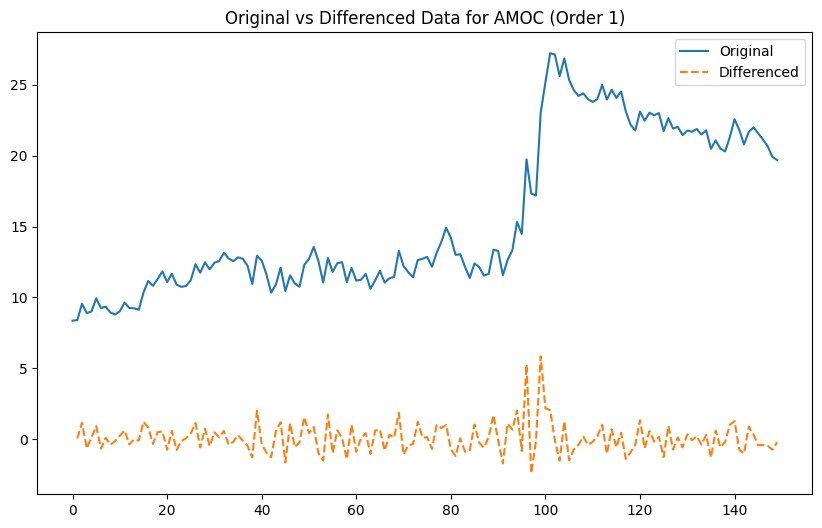

ADF Statistic: -14.249225471191762
p-value: 1.4910220399082335e-26
Critical Values:
	1%: -3.4753253063120644
	5%: -2.881274703275226
	10%: -2.5772928360116873
The series is stationary.
Series in column 'AMOC' is stationary after 1 differencing operation(s).
ADF Statistic: -1.2819465955303744
p-value: 0.6373907663613375
Critical Values:
	1%: -3.476597917537401
	5%: -2.8818291230495543
	10%: -2.5775887982253085
The series is not stationary.


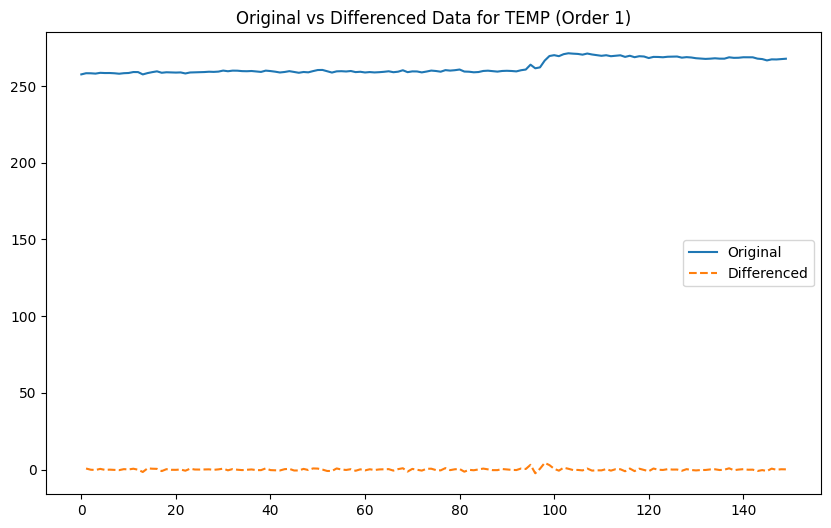

ADF Statistic: -3.700093251439938
p-value: 0.004111842665085277
Critical Values:
	1%: -3.476597917537401
	5%: -2.8818291230495543
	10%: -2.5775887982253085
The series is stationary.
Series in column 'TEMP' is stationary after 1 differencing operation(s).
ADF Statistic: -0.9552164137572907
p-value: 0.7692458301503794
Critical Values:
	1%: -3.4753253063120644
	5%: -2.881274703275226
	10%: -2.5772928360116873
The series is not stationary.


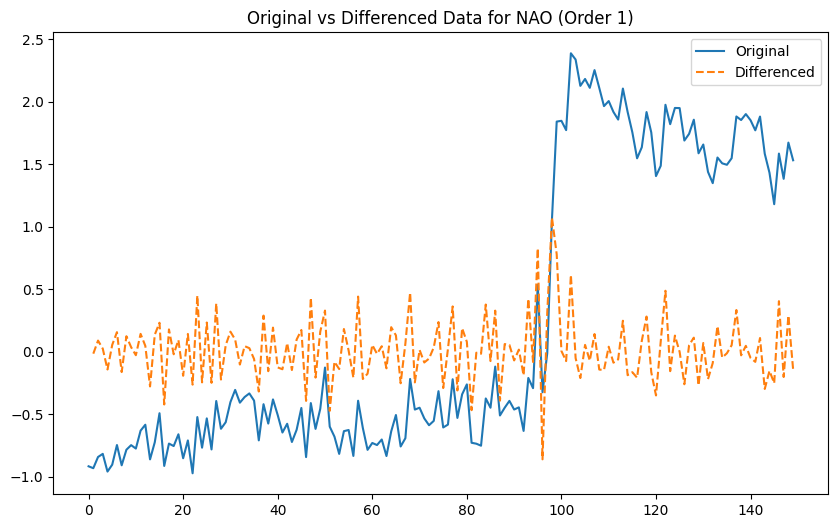

ADF Statistic: -16.101109328026492
p-value: 5.130453486236403e-29
Critical Values:
	1%: -3.4753253063120644
	5%: -2.881274703275226
	10%: -2.5772928360116873
The series is stationary.
Series in column 'NAO' is stationary after 1 differencing operation(s).
ADF Statistic: -1.612756730189127
p-value: 0.4765286499523702
Critical Values:
	1%: -3.4753253063120644
	5%: -2.881274703275226
	10%: -2.5772928360116873
The series is not stationary.


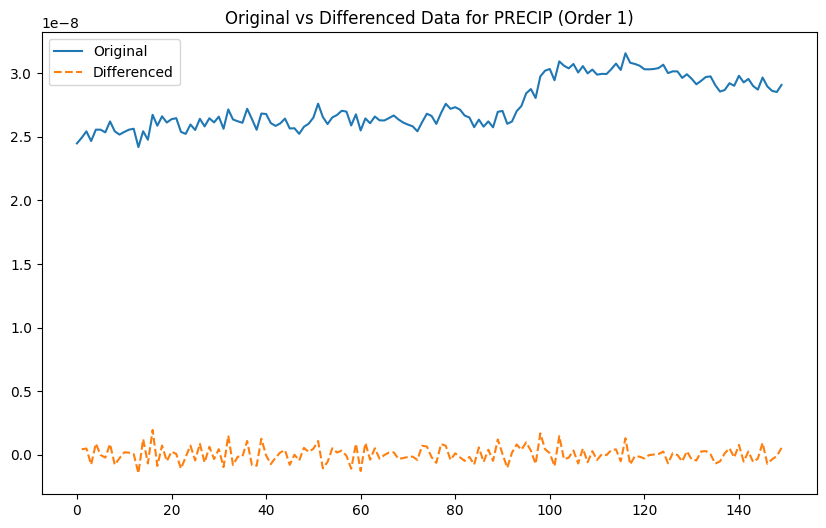

ADF Statistic: -9.408656504946752
p-value: 5.916514169356994e-16
Critical Values:
	1%: -3.4759527332353084
	5%: -2.881548071241103
	10%: -2.577438765246763
The series is stationary.
Series in column 'PRECIP' is stationary after 1 differencing operation(s).
ADF Statistic: -1.3305129269225355
p-value: 0.6150996062389701
Critical Values:
	1%: -3.476597917537401
	5%: -2.8818291230495543
	10%: -2.5775887982253085
The series is not stationary.


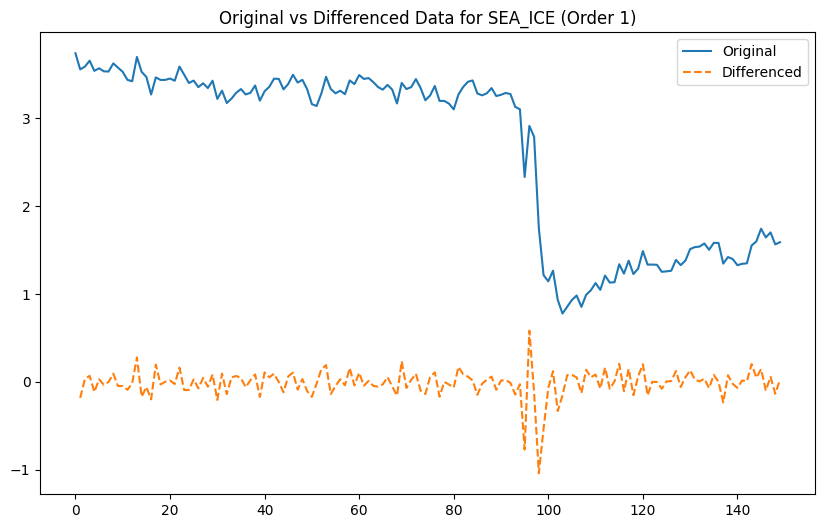

ADF Statistic: -3.631454036746739
p-value: 0.005187396371383958
Critical Values:
	1%: -3.476597917537401
	5%: -2.8818291230495543
	10%: -2.5775887982253085
The series is stationary.
Series in column 'SEA_ICE' is stationary after 1 differencing operation(s).


In [4]:
import importlib
from toolbox import GC_functions as GC
importlib.reload(GC)

df_all_vars_warming=GC.make_stationary(df_all_vars,['AMOC', 'TEMP', 'NAO', 'PRECIP', 'SEA_ICE'], test_method='ADF',plot=True)